_data from https://www.kaggle.com/vfomenko/russian-news-2020_

In [1]:
# Read the data
import pandas as pd
import re
import numpy as np
from datetime import datetime
from dateutil import tz

# def join_whitespace(text):
#     return text.
    #return '\n'.join([' '.join(line.strip().split()) for line in text.split('\n')])
    #return ' '.join((''.join(text.splitlines())).split()) 

def remove_short_paragraphs(text, min_length=50):
    return "\n".join([line for line in text.splitlines() if len(line) >= min_length])

def remove_non_cyrillic(text):
    return "\n".join([line for line in text.splitlines() if re.search('[А-яЁё]', line)])

def clean_meduza_time(x):
    return ' '.join(x.split()[-2:])

def clean_tjournal_time(x):
    if len(x) > 10 :
        return x
    utc = datetime.utcfromtimestamp(int(x))
    to_zone = tz.gettz('Europe/Moscow')
    ret = utc.astimezone(to_zone)
    return ret


df=pd.read_csv("./data/archive.zip")
df = df.drop(['rubric', 'subrubric', 'tags'], axis=1)
df.insert(0, 'id', range(len(df)))
df=df[~df['text'].isnull()]
df['title'] = df['title'].str.strip()

df['text'] = df['text'].str.strip()
df['text'] = df['text'].str.replace('\s*\n+\s*', '\n', regex=True)
df['text'] = df['text'].apply(remove_short_paragraphs)
df['text'] = df['text'].str.replace('^.{2,20}РИА Новости.', '', regex=True)
df['text'] = df['text'].str.replace('Что не выразить словами - выражайте деньгами.', 'rem')
df['text'] = df['text'].apply(remove_non_cyrillic)
df=df[df['text'].str.len()>=200]

df['publication_date'] = df['publication_date'].str.replace('.*?обновлено: ', '', regex=True)
df['publication_date'] = df['publication_date'].str.replace('\)$', '', regex=True)
df['publication_date'] = df['publication_date'].str.replace(',', '')
df['publication_date'] = df['publication_date'].str.replace(' 2 месяца назад', '')

for num, month in enumerate(['января', 'февраля', 'марта', 'апреля', 'мая', 'июня', 'июля', 'августа', 'сентября', 'октября', 'ноября', 'декабря'], start=1):
    df['publication_date'] = df['publication_date'].str.replace(' {0} '.format(month), '.{0}.'.format(num), regex=True)

df['publication_date'] = np.where(df['source'] == 'meduza.io', df['publication_date'].apply(clean_meduza_time), df['publication_date'])
df['publication_date'] = np.where(df['source'] == 'tjournal.ru', df['publication_date'].apply(clean_tjournal_time), df['publication_date'])

df['publication_date'] = pd.to_datetime(df['publication_date'], utc=True)

print("\nArticle counts by publisher:")
print(df['source'].value_counts(), "\n")
print(df.info())
df

c:\users\whyve\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:41: FutureWarning: The default value of regex will change from True to False in a future version.



Article counts by publisher:
ria.ru         14746
lenta.ru        4510
meduza.io       1523
tjournal.ru      845
Name: source, dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21624 entries, 0 to 21672
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                21624 non-null  int32              
 1   source            21624 non-null  object             
 2   title             21622 non-null  object             
 3   text              21624 non-null  object             
 4   publication_date  21624 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int32(1), object(3)
memory usage: 929.2+ KB
None


,id,source,title,text,publication_date
0,0,lenta.ru,Синий богатырь,В 1930-е годы Советский Союз охватила лихорадк...,2020-08-29 21:01:00+00:00
1,1,lenta.ru,Загитова согласилась вести «Ледниковый период»,Олимпийская чемпионка по фигурному катанию Ал...,2020-08-31 17:04:00+00:00
2,2,lenta.ru,Объяснена опасность однообразного питания,Российский врач-диетолог Римма Мойсенко объясн...,2020-08-31 17:07:00+00:00
3,3,lenta.ru,«Предохраняться? А зачем?»,В 2019 году телеканал «Ю» запустил адаптацию з...,2020-08-29 21:04:00+00:00
4,4,lenta.ru,Ефремов систематически употреблял наркотики,Актер Михаил Ефремов систематически употребл...,2020-08-31 15:27:00+00:00
...,...,...,...,...,...
21668,21668,tjournal.ru,Россия прекратила поставки нефти на белорусски...,Россия прекратила поставки нефти на белорусс...,2020-01-03 21:04:34+00:00
21669,21669,tjournal.ru,Во Владивостоке в новогоднюю ночь сожгли фигур...,Светодиодную конструкцию не хотели убирать из-...,2020-01-01 16:22:31+00:00
21670,21670,tjournal.ru,Дым от австралийских лесных пожаров достиг Нов...,Власти направили военные корабли и авиацию для...,2020-01-01 15:35:24+00:00
21671,21671,tjournal.ru,Около 200 жителей закрытого Новоуральска встре...,"С каждым годом количество горожан, выбирающих ...",2020-01-01 23:56:08+00:00


In [2]:
%%time
# Preprocess the data
import nltk
from pymystem3 import Mystem
from helpers import get_text
nltk.download("stopwords")
from nltk.corpus import stopwords

mystem = Mystem() 
stopwordsiso = get_text("./data/stop_words.txt").split("\n")
russian_stopwords = stopwords.words("russian") + stopwordsiso

def preprocess_text(text):
    lead = ".".join(text.split('.', 3)[:3]) + "."
    preprocessed_text = [word for word in mystem.analyze(lead) if 'analysis' in word]
    preprocessed_text = [(word['analysis'][0]['lex'] + "_" + word['analysis'][0]['gr']
                          if len(word['analysis']) > 0  
                          else word['text'] + "_" + "S,")
                         for word in preprocessed_text]
    preprocessed_text = [word.split("_")[0] for word in preprocessed_text
                        if any(pos_filter in word.split("_")[1] for pos_filter in ['S,', 'V,'])
                        and word.split("_")[0] not in russian_stopwords]
    return " ".join(preprocessed_text)


# selected = df.loc[(df['publication_date'] > '2020-11-12') & (df['publication_date'] < '2020-12-13')]
selected = df.loc[df['publication_date'].dt.day.isin([1, 10, 20])]
selected['preprocessed_text'] = selected['text'].apply(preprocess_text)
selected

# Preprocesse entire dataset 
# df['preprocessed_text'] = df['text'].apply(preprocess_text)
# df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Whyve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Wall time: 39min 41s


c:\users\whyve\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,id,source,title,text,publication_date,preprocessed_text
201,201,lenta.ru,Россия попросила Совбез ООН экстренно собратьс...,Россия запросила экстренное заседание Совета ...,2020-08-20 20:38:00+00:00,россия заседание совет безопасность оон связь ...
202,202,lenta.ru,Власти Белоруссии оценили ситуацию с забастовками,Все предприятия Белоруссии работают в нормальн...,2020-08-20 20:04:00+00:00,предприятие белоруссия работать режим план вып...
203,203,lenta.ru,Суд отказался вернуть дело Ефремова в прокуратуру,Пресненский суд Москвы отказался вернуть дело ...,2020-08-20 19:31:00+00:00,суд москва отказываться вернуть дело актер мих...
204,204,lenta.ru,Собянин назвал условие для перевода школьников...,Мэр Москвы Сергей Собянин назвал условие для...,2020-08-20 19:13:00+00:00,мэр москва сергей собянин называть условие пер...
205,205,lenta.ru,Лидера стачкома МАЗа задержали,Лидера стачкома Минского автозавода (МАЗ) Евге...,2020-08-20 18:54:00+00:00,лидер стачком автозавод маз евгений бохвалов з...
...,...,...,...,...,...,...
21647,21647,tjournal.ru,Reddit запретил публикацию дипфейков и других ...,"Администрация платформы уточнила, что их по пр...",2020-01-10 16:35:42+00:00,администрация платформа уточнять выкладывать ц...
21669,21669,tjournal.ru,Во Владивостоке в новогоднюю ночь сожгли фигур...,Светодиодную конструкцию не хотели убирать из-...,2020-01-01 16:22:31+00:00,конструкция хотеть суд водитель владивосток фи...
21670,21670,tjournal.ru,Дым от австралийских лесных пожаров достиг Нов...,Власти направили военные корабли и авиацию для...,2020-01-01 15:35:24+00:00,власть направлять корабль авиация борьба огонь...
21671,21671,tjournal.ru,Около 200 жителей закрытого Новоуральска встре...,"С каждым годом количество горожан, выбирающих ...",2020-01-01 23:56:08+00:00,количество горожанин альтернатива застолье уве...


In [3]:
print(russian_stopwords[-10:])

['подвергаться', 'телеканал', 'страница', 'канал', 'город', 'улица', 'состав', 'представитель пресс', 'миллиард', 'миллион']


In [122]:
# Cluster data
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

vectorizer=TfidfVectorizer(analyzer='word', ngram_range=(1,2))
tfidfVectors=vectorizer.fit_transform(selected['preprocessed_text'])
terms=vectorizer.get_feature_names()
text = vectorizer.transform(selected['preprocessed_text'])

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters


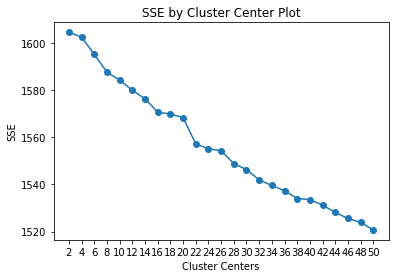

In [129]:
# Based on these clusters, run sentiment analysis on the data
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 50)

,id,source,title,text,publication_date,preprocessed_text,cluster,sentiment,sentiment_title
201,201,lenta.ru,Россия попросила Совбез ООН экстренно собратьс...,Россия запросила экстренное заседание Совета ...,2020-08-20 20:38:00+00:00,россия заседание совет безопасность оон связь ...,5,-1,0
202,202,lenta.ru,Власти Белоруссии оценили ситуацию с забастовками,Все предприятия Белоруссии работают в нормальн...,2020-08-20 20:04:00+00:00,предприятие белоруссия работать режим план вып...,7,-1,0
203,203,lenta.ru,Суд отказался вернуть дело Ефремова в прокуратуру,Пресненский суд Москвы отказался вернуть дело ...,2020-08-20 19:31:00+00:00,суд москва отказываться вернуть дело актер мих...,5,-1,-1
204,204,lenta.ru,Собянин назвал условие для перевода школьников...,Мэр Москвы Сергей Собянин назвал условие для...,2020-08-20 19:13:00+00:00,мэр москва сергей собянин называть условие пер...,20,-1,0
205,205,lenta.ru,Лидера стачкома МАЗа задержали,Лидера стачкома Минского автозавода (МАЗ) Евге...,2020-08-20 18:54:00+00:00,лидер стачком автозавод маз евгений бохвалов з...,0,-1,0
...,...,...,...,...,...,...,...,...,...
21647,21647,tjournal.ru,Reddit запретил публикацию дипфейков и других ...,"Администрация платформы уточнила, что их по пр...",2020-01-10 16:35:42+00:00,администрация платформа уточнять выкладывать ц...,20,-1,0
21669,21669,tjournal.ru,Во Владивостоке в новогоднюю ночь сожгли фигур...,Светодиодную конструкцию не хотели убирать из-...,2020-01-01 16:22:31+00:00,конструкция хотеть суд водитель владивосток фи...,1,-1,0
21670,21670,tjournal.ru,Дым от австралийских лесных пожаров достиг Нов...,Власти направили военные корабли и авиацию для...,2020-01-01 15:35:24+00:00,власть направлять корабль авиация борьба огонь...,21,0,0
21671,21671,tjournal.ru,Около 200 жителей закрытого Новоуральска встре...,"С каждым годом количество горожан, выбирающих ...",2020-01-01 23:56:08+00:00,количество горожанин альтернатива застолье уве...,20,1,0


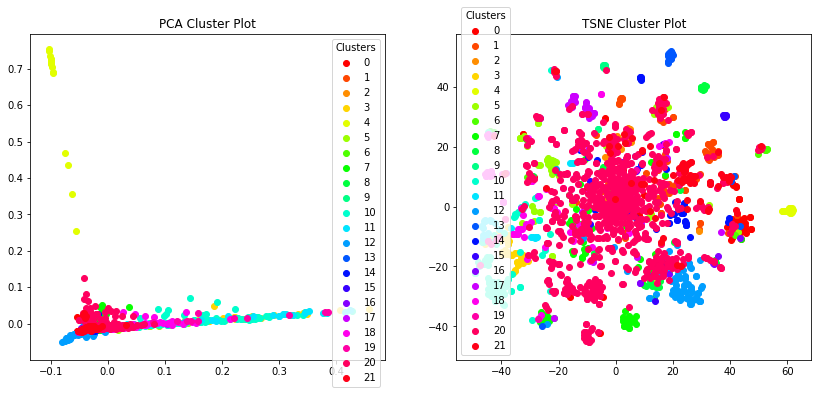

In [130]:
def plot_tsne_pca(data, labels, size):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=size, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=size, replace=False)
    label_subset = labels[max_items]
    label_subset_colors = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    for g in np.unique(label_subset):
        i = np.where(label_subset == g)
        ax[0].scatter(pca[i, 0], pca[i, 1], c=[cm.hsv(g/max_label)], label=g)
    ax[0].legend(loc="upper right", title="Clusters")
    ax[0].set_title('PCA Cluster Plot')
    
    for g in np.unique(label_subset):
        i = np.where(label_subset == g)
        ax[1].scatter(tsne[i, 0], tsne[i, 1], c=[cm.hsv(g/max_label)], label=g)
    ax[1].legend(loc="lower left", title="Clusters")
    ax[1].set_title('TSNE Cluster Plot')

clusters = MiniBatchKMeans(n_clusters=22, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)
plot_tsne_pca(text, clusters, len(selected))

selected['cluster'] = clusters
selected

In [132]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        terms = np.argsort(r)[-n_terms:]
        terms = [labels[t] for t in terms]
        terms.reverse()
        print(','.join(terms))
            
get_top_keywords(text, clusters, vectorizer.get_feature_names(), 10)


Cluster 0
служба,пресс служба,пресс,пожар,движение,площадь,гектар,служба мчс,мск,площадь гектар

Cluster 1
владивосток,автомобиль,пострадать,машина,край,магадан,мчс,посадка,помощь,управление

Cluster 2
instagram,снимок,модель,певица,видео,аккаунт,instagram аккаунт,кузьмин,белье,фотограф

Cluster 3
база,ирак,удар,асад,сша,иран,сулеймани,генерал,генерал касем,касем

Cluster 4
премьер лига,лига,тур,лига апл,тур премьер,го тур,матч го,апл,апл ру,матч

Cluster 5
оон,сша,ливия,санкция,режим,совет,конференция,безопасность,россия,совет безопасность

Cluster 6
уайт,чемпионат ufc,ufc,чемпионат,макгрегор,mma,ufc дэйн,дэйн уайт,дэйн,поединок

Cluster 7
путин,россия,президент,владимир путин,владимир,президент россия,министр,турция,премьер,премьер министр

Cluster 8
гон,воз,nissan,коронавирус,карлос гон,карлос,япония,nissan карлос,пандемия,автоконцерн nissan

Cluster 9
землетрясение,магнитуда,землетрясение магнитуда,зафиксировать,сейсмолог,эбеко,вулкан эбеко,utc,зафиксировать utc,остров

Cluster 10

In [2]:
%%time
# Conduct sentiment analysis on each article
# model from https://huggingface.co/blanchefort/rubert-base-cased-sentiment
import torch
from transformers import AutoModelForSequenceClassification
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained('blanchefort/rubert-base-cased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('blanchefort/rubert-base-cased-sentiment', return_dict=True)

@torch.no_grad()
def predict(text):
    inputs = tokenizer(text, max_length=512, padding=True, truncation=True, return_tensors='pt')
    outputs = model(**inputs)
    predicted = torch.nn.functional.softmax(outputs.logits, dim=1)
    predicted = torch.argmax(predicted, dim=1).numpy()
    return predicted[0]

Wall time: 20.1 s


In [10]:
%%time
# 0: NEUTRAL
# 1: POSITIVE
# 2: NEGATIVE

selected['sentiment'] = selected['text'].apply(predict)
selected

Wall time: 24min 12s


c:\users\whyve\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,id,source,title,text,publication_date,preprocessed_text,cluster,sentiment
201,201,lenta.ru,Россия попросила Совбез ООН экстренно собратьс...,Россия запросила экстренное заседание Совета ...,2020-08-20 20:38:00+00:00,россия заседание совет безопасность оон связь ...,5,2
202,202,lenta.ru,Власти Белоруссии оценили ситуацию с забастовками,Все предприятия Белоруссии работают в нормальн...,2020-08-20 20:04:00+00:00,предприятие белоруссия работать режим план вып...,2,2
203,203,lenta.ru,Суд отказался вернуть дело Ефремова в прокуратуру,Пресненский суд Москвы отказался вернуть дело ...,2020-08-20 19:31:00+00:00,суд москва отказываться вернуть дело актер мих...,5,2
204,204,lenta.ru,Собянин назвал условие для перевода школьников...,Мэр Москвы Сергей Собянин назвал условие для...,2020-08-20 19:13:00+00:00,мэр москва сергей собянин называть условие пер...,11,2
205,205,lenta.ru,Лидера стачкома МАЗа задержали,Лидера стачкома Минского автозавода (МАЗ) Евге...,2020-08-20 18:54:00+00:00,лидер стачком автозавод маз евгений бохвалов з...,2,2
...,...,...,...,...,...,...,...,...
21647,21647,tjournal.ru,Reddit запретил публикацию дипфейков и других ...,"Администрация платформы уточнила, что их по пр...",2020-01-10 16:35:42+00:00,администрация платформа уточнять выкладывать ц...,2,2
21669,21669,tjournal.ru,Во Владивостоке в новогоднюю ночь сожгли фигур...,Светодиодную конструкцию не хотели убирать из-...,2020-01-01 16:22:31+00:00,конструкция хотеть суд водитель владивосток фи...,1,2
21670,21670,tjournal.ru,Дым от австралийских лесных пожаров достиг Нов...,Власти направили военные корабли и авиацию для...,2020-01-01 15:35:24+00:00,власть направлять корабль авиация борьба огонь...,16,0
21671,21671,tjournal.ru,Около 200 жителей закрытого Новоуральска встре...,"С каждым годом количество горожан, выбирающих ...",2020-01-01 23:56:08+00:00,количество горожанин альтернатива застолье уве...,2,1


In [11]:
# save dataframe for future use
selected.loc[selected['sentiment'] == 2, 'sentiment'] = -1
selected.to_pickle("./data/selected_2.pkl")

c:\users\whyve\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [5]:
# Analysis of data
# Average sentiment of each cluster
print("avg. of each cluster:\n", selected.groupby('cluster')['sentiment'].mean())

# Average sentiment of each source
print("\n\navg. of each source:\n", selected.groupby('source')['sentiment'].mean())

# Sentiment of each cluster over time
# selected.groupby('publication_date')['sentiment'].mean()
print("\n\navg. by date and cluster:\n", selected.groupby([selected['publication_date'].dt.date])['sentiment'].mean())


# Sentiment of a search term over time
print("\n\navg. of Putin over time:\n", selected.loc[selected['text'].str.contains("Путин")].groupby([selected['publication_date'].dt.date])['sentiment'].mean())
print("\n\navg. of putin by source:\n", selected.loc[selected['text'].str.contains("Псаки")].groupby('source')['sentiment'].mean())

avg. of each cluster:
 cluster
0    -0.644444
1    -0.538462
2    -0.794643
3    -0.928571
4    -0.916667
5    -0.823529
6    -0.176471
7    -0.600000
8    -0.266667
9    -0.802469
10   -0.560000
11   -0.823529
12   -0.714286
13   -0.571429
14   -1.000000
15   -0.745098
16   -0.666667
17   -0.750000
18   -0.250000
19   -0.740741
20   -0.727273
21   -0.763158
22   -0.687500
23   -0.619048
24   -0.800000
25   -0.294118
26   -0.640000
27   -0.600000
28   -0.636364
29   -0.562500
30   -0.687500
31   -0.569425
Name: sentiment, dtype: float64


avg. of each source:
 source
lenta.ru      -0.683099
meduza.io     -0.352000
ria.ru        -0.642930
tjournal.ru   -0.790698
Name: sentiment, dtype: float64


avg. by date and cluster:
 publication_date
2020-01-01   -0.649123
2020-01-10   -0.608696
2020-01-20   -0.567568
2020-02-01   -0.418919
2020-02-10   -0.550000
2020-02-20   -0.613333
2020-03-01   -0.779221
2020-03-10   -0.772727
2020-03-20   -0.670588
2020-04-01   -0.683544
2020-04-10   -0.750000

In [98]:
# lenta.ru      -0.692308
# meduza.io     -0.307692
# ria.ru        -0.739130
# tjournal.ru   -0.818182

selected.loc[selected['sentiment_title'] == 1]

,id,source,title,text,publication_date,preprocessed_text,cluster,sentiment,sentiment_title
1481,1481,lenta.ru,50-летняя актриса показала тело в бикини и обр...,Американская актриса и звезда реалити-шоу Хиз...,2020-06-10 19:24:00+00:00,актриса звезда реалити-шоу хизер грэм Heather ...,2,1,1
1660,1660,lenta.ru,Раскрыто влияние коронавируса на доброту россиян,"Пандемия коронавируса показала, что россияне г...",2020-06-01 19:05:00+00:00,пандемия коронавирус россиянин проявлять добро...,2,1,1
1881,1881,lenta.ru,Apple и Google помогут в выявлении контактов б...,Apple и Google разработали технологию отсле...,2020-05-20 20:08:00+00:00,Apple Google технология отслеживание контакт л...,2,-1,1
2242,2242,lenta.ru,Подмосковным врачам напомнили о выплатах из-за...,"Подмосковным врачам, которые борются с коронав...",2020-05-01 14:40:00+00:00,врач бороться коронавирус полагаться выплата м...,2,-1,1
2653,2653,lenta.ru,«Россия 1» покажет концерт в поддержку медиков...,Телеканал «Россия 1» покажет концерт «Мы вмест...,2020-04-10 15:44:11+00:00,россия концерт поддержка медик лечить пациент ...,2,-1,1
3036,3036,lenta.ru,Эмили Ратаковски показала лучший откровенный о...,Американская супермодель и предпринимательница...,2020-03-20 20:20:00+00:00,супермодель предпринимательница эмили наряд сн...,2,0,1
3564,3564,lenta.ru,Российская пенсионерка променяла переезд в Изр...,Российская пенсионерка отказалась от квартиры ...,2020-02-20 16:33:00+00:00,пенсионерка отказываться квартира ЖК одинбург ...,2,-1,1
8659,8659,ria.ru,"Тренер рассказал, как избавиться от лишнего жи...",В погоне за хорошей фигурой многие прибегают...,2020-07-20 09:55:00+00:00,погоня фигура прибегать методика похудение суш...,2,1,1
8666,8666,ria.ru,Гидрометцентр спрогнозировал жару на полюсе хо...,"Температура на северо-востоке Якутии, в райо...",2020-07-20 03:04:00+00:00,температура северо-восток якутия район полюс х...,56,-1,1
8672,8672,ria.ru,Ученые рассказали об эффективности ультрафиоле...,Сергей Старцев. Ультрафиолетовое излучение с...,2020-07-20 15:16:00+00:00,сергей старец излучение спектр уничтожать коро...,2,0,1


In [34]:
# print("\n\navg. by date and cluster:\n", selected.groupby([selected['publication_date'].dt.date])['sentiment'].mean())


# Sentiment of a search term over time
print("\n\navg. of лукашенко over time:\n", selected.loc[selected['text'].str.contains("Лукашенко")].groupby([selected['publication_date'].dt.date])['sentiment'].mean())
print("\n\navg. of лукашенко over time:\n", selected.loc[selected['text'].str.contains("Лукашенко")].groupby([selected['source']])['sentiment'].mean())



avg. of лукашенко over time:
 publication_date
2020-01-01   -1.00
2020-06-10    0.00
2020-06-20   -0.25
2020-07-20   -0.50
2020-08-01   -1.00
2020-08-10   -0.75
2020-08-20   -1.00
Name: sentiment, dtype: float64


avg. of лукашенко over time:
 source
lenta.ru      -0.666667
meduza.io      0.000000
ria.ru        -0.857143
tjournal.ru   -1.000000
Name: sentiment, dtype: float64


In [3]:
# selected.loc[selected['preprocessed_text'].isin("лига апл")
selected.loc[selected['text'].str.contains("Псаки")]
print(df.iloc[753,3], "\n")
# print(df.iloc[753,5])

«Брайтон» на своем поле сыграл вничью с «Ньюкаслом» в матче 37-го тура Английской премьер-лиги (АПЛ). Об этом сообщает корреспондент «Ленты.ру». Встреча прошла в понедельник, 20 июля, и завершилась со счетом 0:0. Обе команды имели шансы забить, но отличиться никому не удалось. После 37 туров в активе «Брайтона» 38 очков, клуб находится на 15-м месте в чемпионате. «Ньюкасл» набрал на шесть очков больше и занимает 13-ю позицию. В следующем туре «Брайтон» 26 июля на выезде сыграет с «Бернли». «Ньюкасл» в тот же день на своем поле встретится с «Ливерпулем». 



In [33]:
# load a saved dataframe
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import tz
import pickle

selected = pickle.load( open( "./data/selected_2.pkl", "rb" ) )

In [105]:
df.loc[(df['text'].str.contains("Лукашенко")) & (df['publication_date'].dt.date == pd.Timestamp('2020-06-10'))]
print(df.iloc[1493,3])

Президент Белоруссии  Александр Лукашенко  решил подарить своему украинскому коллеге  Владимиру Зеленскому  белорусскую вышиванку. Об этом сообщает близкий к пресс-службе президента Белоруссии  Telegram -канал «Пул Первого». Такой же подарок был направлен и первой леди Украины  Елене Зеленской . К посылке Лукашенко приложил письмо, в котором заявил, что белорусы и украинцы «исторически стояли плечом к плечу, защищали права на самостоятельное и свободное развитие». Ожидается, что подарки прибудут к украинскому лидеру к белорусскому Дню вышиванки, который отмечается 2 июля. 21 мая в честь Международного дня вышиванки Зеленский с женой  поздравили  украинцев снимком в традиционных рубашках. Лидерам мировых держав президентская чета  отправила  «символические подарки, которые несут в себе часть украинской истории и культуры». Их получили президенты и первые леди Белоруссии, США, Франции, Польши, Турции и других государств.


In [108]:
# selected.loc[(selected['text'].str.contains("Лукашенко")) & (selected['source'] == 'meduza.io')]
print(df.iloc[1881,2], "\n\n")
print(df.iloc[1881,3])

Apple и Google помогут в выявлении контактов больных с коронавирусом 


Apple  и  Google  разработали технологию отслеживания контактов лиц, которые заражены новым коронавирусом. Об этом сообщила телекомпания CNBC. Компании объединили силы, чтобы помочь медицинским работникам. Отмечается, что ими была создана технология, которая позволяет отслеживать контакты больных с помощью беспроводной связи Bluetooth. Обе корпорации в ближайшее время планируют превратить свои наработки в сложный многофункциональный инструмент, который будет предназначен для помощи врачам в отслеживании контактов зараженных. В марте  сообщалось , что Apple и Google начали удалять из своих магазинов приложений программы на тему коронавируса. В Apple заявили, что все приложения из App Store на тему вспышки COVID-19, вызванной вирусом SARS-CoV-2, должны быть представлены государственными компаниями или официальными организациями здравоохранения, а остальную информацию корпорация скроет от пользователей. Таким образом 

In [39]:
%%time
# 0: NEUTRAL
# 1: POSITIVE
# 2: NEGATIVE

selected['sentiment_title'] = selected['title'].apply(predict)
selected

Wall time: 3min 5s


,id,source,title,text,publication_date,preprocessed_text,cluster,sentiment,sentiment_title
201,201,lenta.ru,Россия попросила Совбез ООН экстренно собратьс...,Россия запросила экстренное заседание Совета ...,2020-08-20 20:38:00+00:00,россия заседание совет безопасность оон связь ...,5,-1,0
202,202,lenta.ru,Власти Белоруссии оценили ситуацию с забастовками,Все предприятия Белоруссии работают в нормальн...,2020-08-20 20:04:00+00:00,предприятие белоруссия работать режим план вып...,2,-1,0
203,203,lenta.ru,Суд отказался вернуть дело Ефремова в прокуратуру,Пресненский суд Москвы отказался вернуть дело ...,2020-08-20 19:31:00+00:00,суд москва отказываться вернуть дело актер мих...,5,-1,2
204,204,lenta.ru,Собянин назвал условие для перевода школьников...,Мэр Москвы Сергей Собянин назвал условие для...,2020-08-20 19:13:00+00:00,мэр москва сергей собянин называть условие пер...,11,-1,0
205,205,lenta.ru,Лидера стачкома МАЗа задержали,Лидера стачкома Минского автозавода (МАЗ) Евге...,2020-08-20 18:54:00+00:00,лидер стачком автозавод маз евгений бохвалов з...,2,-1,0
...,...,...,...,...,...,...,...,...,...
21647,21647,tjournal.ru,Reddit запретил публикацию дипфейков и других ...,"Администрация платформы уточнила, что их по пр...",2020-01-10 16:35:42+00:00,администрация платформа уточнять выкладывать ц...,2,-1,0
21669,21669,tjournal.ru,Во Владивостоке в новогоднюю ночь сожгли фигур...,Светодиодную конструкцию не хотели убирать из-...,2020-01-01 16:22:31+00:00,конструкция хотеть суд водитель владивосток фи...,1,-1,0
21670,21670,tjournal.ru,Дым от австралийских лесных пожаров достиг Нов...,Власти направили военные корабли и авиацию для...,2020-01-01 15:35:24+00:00,власть направлять корабль авиация борьба огонь...,16,0,0
21671,21671,tjournal.ru,Около 200 жителей закрытого Новоуральска встре...,"С каждым годом количество горожан, выбирающих ...",2020-01-01 23:56:08+00:00,количество горожанин альтернатива застолье уве...,2,1,0


In [3]:
# save dataframe for future use
# selected.loc[selected['sentiment_title'] == 2, 'sentiment_title'] = -1
selected.to_pickle("./data/selected_3.pkl")

NameError: name 'selected' is not defined

In [41]:
# Analysis of data
# Average sentiment of each cluster
print("avg. of each cluster:\n", selected.groupby('cluster')['sentiment_title'].mean())

# Average sentiment of each source
print("\n\navg. of each source:\n", selected.groupby('source')['sentiment_title'].mean())

# Sentiment of each cluster over time
# selected.groupby('publication_date')['sentiment'].mean()
print("\n\navg. by date and cluster:\n", selected.groupby([selected['publication_date'].dt.date])['sentiment_title'].mean())


# Sentiment of a search term over time
print("\n\navg. of Putin over time:\n", selected.loc[selected['text'].str.contains("Путин")].groupby([selected['publication_date'].dt.date])['sentiment_title'].mean())
print("\n\navg. of putin by source:\n", selected.loc[selected['text'].str.contains("Псаки")].groupby('source')['sentiment_title'].mean())

avg. of each cluster:
 cluster
0    -0.250000
1    -0.207547
2    -0.124679
3    -0.187500
4    -0.166667
5    -0.307692
6    -0.139535
7     0.000000
8    -0.342105
9     0.000000
10   -0.125000
11   -0.111111
12   -0.190476
13   -0.272727
14   -0.120000
15   -0.111111
16   -0.068966
17   -0.300000
18    0.000000
19   -0.200000
20    0.000000
21   -0.142857
22   -0.153846
23   -0.103448
24   -0.062500
25    0.111111
26   -0.083333
27   -0.250000
28   -0.142857
29   -0.166667
30   -0.111111
31    0.000000
32   -0.145161
33   -0.083333
34    0.500000
35   -0.125000
36   -0.066667
37    0.000000
38    0.000000
39   -0.200000
40    0.000000
41    0.000000
42   -0.090909
43    0.000000
44   -0.118644
45   -0.444444
46    0.000000
47    0.000000
48    0.055556
49   -0.222222
50    0.000000
51   -0.120000
52    0.000000
53    0.000000
54   -0.142857
55    0.000000
56    0.000000
57   -0.125000
Name: sentiment_title, dtype: float64


avg. of each source:
 source
lenta.ru      -0.154930
meduza



avg. of трамп over time:
 publication_date
1     192
2     110
3     203
4     171
5     195
6     158
7     136
8     176
9      28
10     36
11     34
12     40
dtype: int64


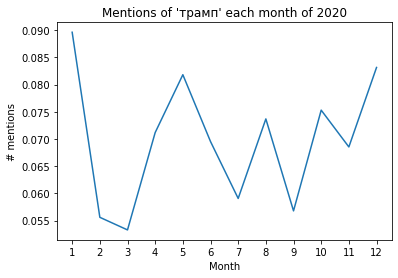

In [89]:
import matplotlib

kw = "трамп"
frame = df.loc[df['text'].str.contains("(?i)"+kw)].groupby([df['publication_date'].dt.month]).size()
total_frame = df.groupby([df['publication_date'].dt.month]).size()
print("\n\navg. of", kw, "over time:\n", frame)

y = np.divide(frame.tolist(),  total_frame.tolist())
x = range(1, len(values)+1)
plt.title("Mentions of '" + kw+ "' each month of 2020")
plt.ylabel('# mentions')
plt.xlabel('Month')
plt.xticks(x)
plt.plot(x,y)
plt.show()

In [139]:
predict("Произошёл бунт")
selected

,id,source,title,text,publication_date,preprocessed_text,cluster,sentiment,sentiment_title
201,201,lenta.ru,Россия попросила Совбез ООН экстренно собратьс...,Россия запросила экстренное заседание Совета ...,2020-08-20 20:38:00+00:00,россия заседание совет безопасность оон связь ...,5,-1,0
202,202,lenta.ru,Власти Белоруссии оценили ситуацию с забастовками,Все предприятия Белоруссии работают в нормальн...,2020-08-20 20:04:00+00:00,предприятие белоруссия работать режим план вып...,7,-1,0
203,203,lenta.ru,Суд отказался вернуть дело Ефремова в прокуратуру,Пресненский суд Москвы отказался вернуть дело ...,2020-08-20 19:31:00+00:00,суд москва отказываться вернуть дело актер мих...,5,-1,-1
204,204,lenta.ru,Собянин назвал условие для перевода школьников...,Мэр Москвы Сергей Собянин назвал условие для...,2020-08-20 19:13:00+00:00,мэр москва сергей собянин называть условие пер...,20,-1,0
205,205,lenta.ru,Лидера стачкома МАЗа задержали,Лидера стачкома Минского автозавода (МАЗ) Евге...,2020-08-20 18:54:00+00:00,лидер стачком автозавод маз евгений бохвалов з...,0,-1,0
...,...,...,...,...,...,...,...,...,...
21647,21647,tjournal.ru,Reddit запретил публикацию дипфейков и других ...,"Администрация платформы уточнила, что их по пр...",2020-01-10 16:35:42+00:00,администрация платформа уточнять выкладывать ц...,20,-1,0
21669,21669,tjournal.ru,Во Владивостоке в новогоднюю ночь сожгли фигур...,Светодиодную конструкцию не хотели убирать из-...,2020-01-01 16:22:31+00:00,конструкция хотеть суд водитель владивосток фи...,1,-1,0
21670,21670,tjournal.ru,Дым от австралийских лесных пожаров достиг Нов...,Власти направили военные корабли и авиацию для...,2020-01-01 15:35:24+00:00,власть направлять корабль авиация борьба огонь...,21,0,0
21671,21671,tjournal.ru,Около 200 жителей закрытого Новоуральска встре...,"С каждым годом количество горожан, выбирающих ...",2020-01-01 23:56:08+00:00,количество горожанин альтернатива застолье уве...,20,1,0
